In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

from tqdm import tqdm

rng = default_rng()

In [2]:
class Ising_2d:
    
    def __init__(self, shape=[100,100], T=1.0, B=0.0, J=2.0):
        # 体系初始化，设定体系的各种参数和初始状态
        self.shape = shape
        self.T = T
        self.B = B
        self.J = J
        self.S = rng.choice((-1, 1), shape)
        
    def bc_x(self, i):
        # 处理边界条件
        if i < 0:
            return self.shape[0] + i
        if i >= self.shape[0]:
            return i - self.shape[0]
        return i
    
    def bc_y(self, j):
        # 处理边界条件
        if j < 0:
            return self.shape[1] + j
        if j >= self.shape[1]:
            return j - self.shape[1]
        return j
    
    def single_energy(self, i, j):
        # 单个格点的能量
        return (
            -self.J/2*self.S[i,j]* \
            (self.S[self.bc_x(i-1),j]+ \
            self.S[self.bc_x(i+1),j]+ \
            self.S[i,self.bc_y(j-1)]+ \
            self.S[i,self.bc_y(j+1)])- \
            self.B*self.S[i,j]
        )
    
    def around_energy(self, i, j):
        # 一个格点及其周围格点的能量
        energy = 0.0
        energy += self.single_energy(i, j)
        energy += self.single_energy(self.bc_x(i-1), j)
        energy += self.single_energy(self.bc_x(i+1), j)
        energy += self.single_energy(i, self.bc_y(j-1))
        energy += self.single_energy(i, self.bc_y(j+1))
        return energy
    
    def probe(self):
        # 取一个试探格点，变换其自旋
        i = rng.integers(0, self.shape[0])
        j = rng.integers(0, self.shape[1])
        # 一个格点的变化只影响与其相邻的格点的能量
        # 因此只计算相邻格点的能量变化
        e0 = self.around_energy(i, j)
        self.S[i, j] *= -1
        e1 = self.around_energy(i, j)
        # 体系服从玻尔兹曼分布，由此得到密度函数
        if np.exp((e0-e1)/self.T) >= rng.random():
            return True
        self.S[i, j] *= -1
        return False
    
    def run(self, N_steps=1000):
        # 进行一定步数的试探
        for _ in tqdm(range(N_steps)):
            self.probe()

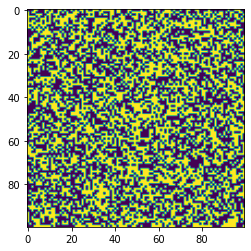

In [3]:
# 初始状态
model = Ising_2d(T=0.1)
plt.imshow(model.S)
plt.show()

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:10<00:00, 9814.77it/s]


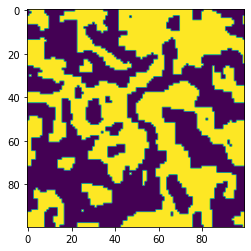

In [4]:
# 演化100000步
model.run(10**5)
plt.imshow(model.S)
plt.show()

In [5]:
# 改变温度
model.T = 10

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:10<00:00, 9406.00it/s]


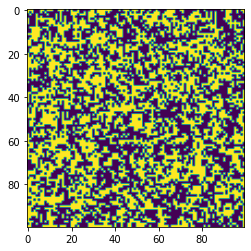

In [6]:
# 演化100000步
model.run(10**5)
plt.imshow(model.S)
plt.show()

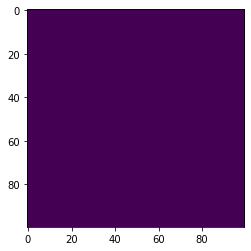

In [7]:
# 将体系设定为给定状态
model.S = np.ones(model.shape)*-1
plt.imshow(model.S)
plt.show()

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:05<00:00, 17044.23it/s]


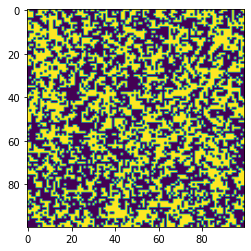

In [8]:
# 演化100000步
model.run(10**5)
plt.imshow(model.S)
plt.show()

In [9]:
# 改变温度
model.T = 0.1

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:06<00:00, 16654.84it/s]


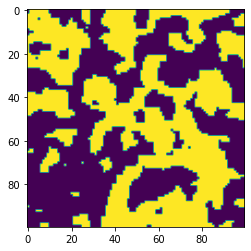

In [10]:
# 演化100000步
model.run(10**5)
plt.imshow(model.S)
plt.show()

In [11]:
# 设置外磁场
model.B = 1

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:06<00:00, 15704.43it/s]


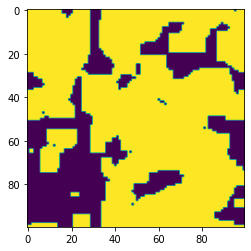

In [12]:
# 演化100000步
model.run(10**5)
plt.imshow(model.S)
plt.show()

In [13]:
# 改变温度
model.T = 10

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:06<00:00, 15537.34it/s]


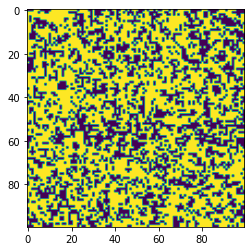

In [14]:
# 演化100000步
model.run(10**5)
plt.imshow(model.S)
plt.show()